# Module 4 - Algo Trading using Classification


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as spo
from sklearn import datasets, linear_model, metrics 

In [2]:
# To increase the size of plots

plt.rcParams['figure.figsize'] = (24, 13.5)

## Please double click on the plot image to enlarge it.

# Query 4.1

Import the csv file of the stock which contained the Bollinger columns as well.
* Create a new column 'Call' , whose entries are -  
    'Buy' if the stock price is below the lower Bollinger band   
    'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band   
    'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band   
    'Short' if the stock price is above the upper Bollinger band 


* Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)  

* Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [3]:
# Importing the CSV file with Bollinger Band Data

##########################################################
#######################  NOTE ############################
## The data file M&M_comp.csv was being computed in module 2. It is a sorted dataframe in which all Series column == EQ
##########################################################

data = pd.read_csv('M&M_comp.csv')
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,year,month,day,Day_Perc_Change,Trend,upper_bollinger_band,lower_bollinger_band
0,2017-05-15,M&amp;M,EQ,1367.85,1373.00,1386.65,1370.00,1374.80,1375.65,1378.31,...,38442,386664,69.27,2017,5,15,0.000000,Slight or No change,NaN,NaN
1,2017-05-16,M&amp;M,EQ,1375.65,1377.00,1380.50,1363.10,1364.15,1366.35,1371.22,...,29075,334469,64.82,2017,5,16,-0.676044,Slight negative,NaN,NaN
2,2017-05-17,M&amp;M,EQ,1366.35,1363.00,1384.35,1360.40,1379.00,1378.80,1378.56,...,32299,689649,74.89,2017,5,17,0.911187,Slight positive,NaN,NaN
3,2017-05-18,M&amp;M,EQ,1378.80,1369.00,1372.00,1347.50,1347.50,1352.85,1361.70,...,20476,1043736,85.70,2017,5,18,-1.882071,Negative,NaN,NaN
4,2017-05-19,M&amp;M,EQ,1352.85,1350.00,1357.60,1328.50,1338.20,1333.40,1344.80,...,36297,773590,79.20,2017,5,19,-1.437706,Negative,NaN,NaN
5,2017-05-22,M&amp;M,EQ,1333.40,1340.15,1341.95,1301.10,1307.00,1306.25,1313.89,...,26521,261661,59.90,2017,5,22,-2.036148,Negative,NaN,NaN
6,2017-05-23,M&amp;M,EQ,1306.25,1315.00,1338.35,1300.00,1328.35,1331.75,1324.90,...,40561,445992,57.17,2017,5,23,1.952153,Positive,NaN,NaN
7,2017-05-24,M&amp;M,EQ,1331.75,1331.50,1338.80,1301.45,1308.00,1308.65,1314.05,...,29997,382266,61.10,2017,5,24,-1.734560,Negative,NaN,NaN
8,2017-05-25,M&amp;M,EQ,1308.65,1311.00,1335.90,1304.00,1335.90,1327.50,1321.97,...,60911,1095811,75.23,2017,5,25,1.440416,Positive,NaN,NaN
9,2017-05-26,M&amp;M,EQ,1327.50,1334.00,1348.90,1327.50,1341.00,1340.85,1339.17,...,16125,156414,46.66,2017,5,26,1.005650,Positive,NaN,NaN


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


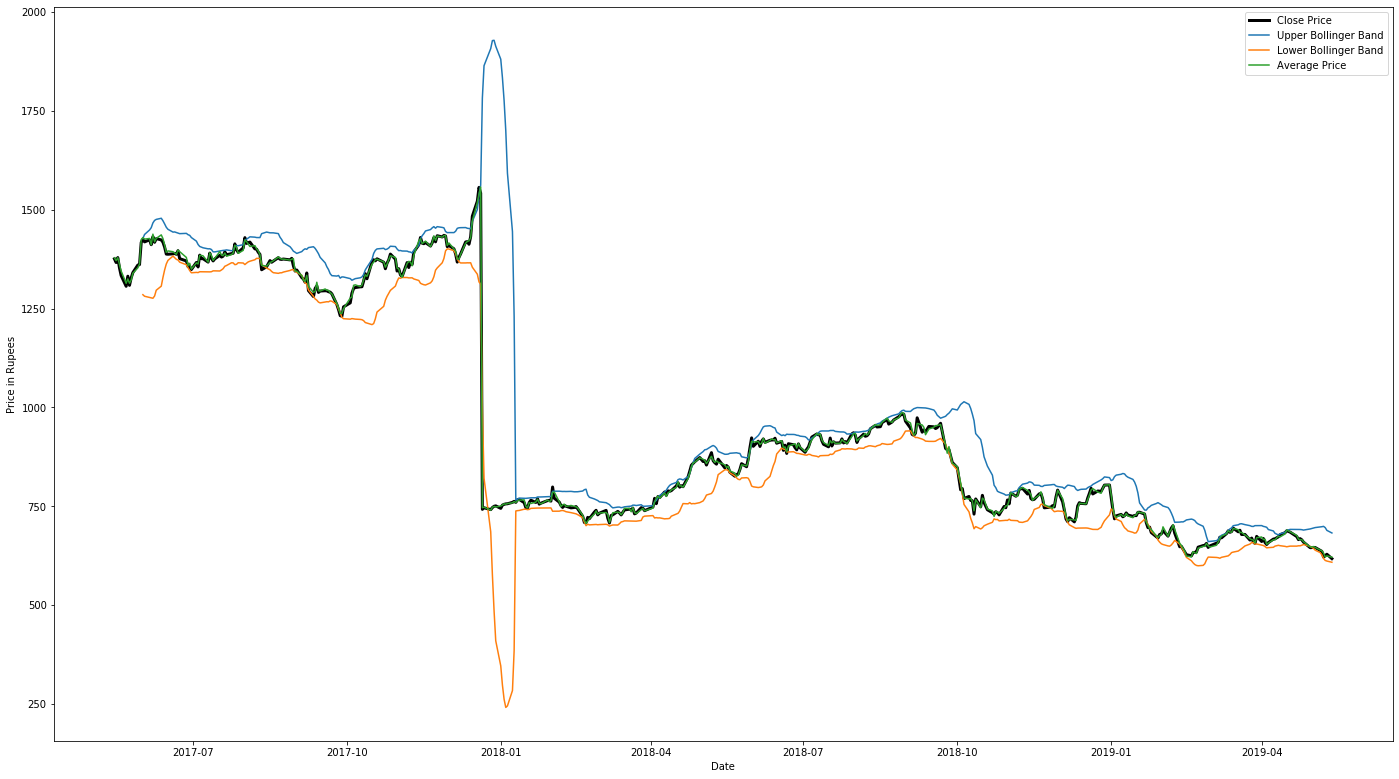

In [4]:
# Plotting the above data

plt.plot(df['Date'], df['Close Price'], label = "Close Price", linewidth = 3, color = 'k')
plt.plot(df['Date'], df['upper_bollinger_band'], label = 'Upper Bollinger Band')
plt.plot(df['Date'], df['lower_bollinger_band'], label = 'Lower Bollinger Band')
plt.plot(df['Date'], df['Average Price'], label = 'Average Price')
plt.xlabel('Date')
plt.ylabel('Price in Rupees')
plt.legend()
plt.show()

## 4.1.1 Making of 'Call' column

In [5]:
## Making of 'Call' column

def making_calls(df):
    dff = df.copy()
    dff = dff.fillna(0)
    
    dfc = pd.DataFrame(columns = ['Call', 'representer'])
    
    for i in range(0, len(df['Close Price'])):
        a = dff['Close Price'][i]
        b = dff['Average Price'][i]
        c = dff['lower_bollinger_band'][i]
        d = dff['upper_bollinger_band'][i]

                
        if (a < c):
            dfc = dfc.append({'Call': 'Buy', 'representer':0}, ignore_index = True)
                
        elif (a > d):
            dfc = dfc.append({'Call': 'Short', 'representer':1}, ignore_index = True)
                    
        elif (a >= b) and (a <= d):
            dfc = dfc.append({'Call': 'Hold Short/ Liquidate Buy', 'representer': 2}, ignore_index = True)
        
        elif (a < b ) and (a >= c):
            dfc = dfc.append({'Call': 'Hold Buy/ Liquidate Short', 'representer': 3}, ignore_index = True)
                    
        
    return dfc

In [6]:
dfx = making_calls(df)
dfx

,Call,representer
0,Short,1
1,Short,1
2,Short,1
3,Short,1
4,Short,1
5,Short,1
6,Short,1
7,Short,1
8,Short,1
9,Short,1


In [7]:
frames = [df, dfx]
df = pd.concat(frames, axis = 1)
df = df.set_index('Date')
df = df.fillna(0)
df

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,...,% Dly Qt to Traded Qty,year,month,day,Day_Perc_Change,Trend,upper_bollinger_band,lower_bollinger_band,Call,representer
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,M&amp;M,EQ,1367.85,1373.00,1386.65,1370.00,1374.80,1375.65,1378.31,558190,...,69.27,2017,5,15,0.000000,Slight or No change,0.000000,0.000000,Short,1
2017-05-16,M&amp;M,EQ,1375.65,1377.00,1380.50,1363.10,1364.15,1366.35,1371.22,516012,...,64.82,2017,5,16,-0.676044,Slight negative,0.000000,0.000000,Short,1
2017-05-17,M&amp;M,EQ,1366.35,1363.00,1384.35,1360.40,1379.00,1378.80,1378.56,920884,...,74.89,2017,5,17,0.911187,Slight positive,0.000000,0.000000,Short,1
2017-05-18,M&amp;M,EQ,1378.80,1369.00,1372.00,1347.50,1347.50,1352.85,1361.70,1217846,...,85.70,2017,5,18,-1.882071,Negative,0.000000,0.000000,Short,1
2017-05-19,M&amp;M,EQ,1352.85,1350.00,1357.60,1328.50,1338.20,1333.40,1344.80,976742,...,79.20,2017,5,19,-1.437706,Negative,0.000000,0.000000,Short,1
2017-05-22,M&amp;M,EQ,1333.40,1340.15,1341.95,1301.10,1307.00,1306.25,1313.89,436797,...,59.90,2017,5,22,-2.036148,Negative,0.000000,0.000000,Short,1
2017-05-23,M&amp;M,EQ,1306.25,1315.00,1338.35,1300.00,1328.35,1331.75,1324.90,780182,...,57.17,2017,5,23,1.952153,Positive,0.000000,0.000000,Short,1
2017-05-24,M&amp;M,EQ,1331.75,1331.50,1338.80,1301.45,1308.00,1308.65,1314.05,625683,...,61.10,2017,5,24,-1.734560,Negative,0.000000,0.000000,Short,1
2017-05-25,M&amp;M,EQ,1308.65,1311.00,1335.90,1304.00,1335.90,1327.50,1321.97,1456698,...,75.23,2017,5,25,1.440416,Positive,0.000000,0.000000,Short,1


## 4.1.2 Training the Logistic Regression Model on Bollinger and Call Data

In [8]:
## Defining the Data

x_dat = [df['Close Price'], df['Average Price'], df['upper_bollinger_band'], df['lower_bollinger_band']]
x = np.array(x_dat)
x = x.T

y = np.array(df['representer'])

print(x.shape)
print(y.shape)

(494, 4)
(494,)


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [10]:
# Training Data

#train_dataset = x
train_set_x_orig = x[:396]
train_set_y_orig = y[:396]

#test_dataset = h5py.File('test_catvnoncat.h5', "r")
test_set_x_orig = x[:-396]
test_set_y_orig = y[:-396]

In [11]:
# Defining The Model

model = LogisticRegression(solver = 'lbfgs')
model.fit(train_set_x_orig, train_set_y_orig)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# use the model to make predictions with the test data
y_pred = model.predict(test_set_x_orig)
# how did our model perform?
count_misclassified = (test_set_y_orig != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(test_set_y_orig, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 2
Accuracy: 0.98


## The Accuracy of the Logistic Regression Model is 98%

## 4.1.3 Testing the model on another stock data

In [13]:
# Importing the data of another stocks

data_itc = pd.read_csv('itc.csv')
itc = pd.DataFrame(data_itc)
itc['Date'] = pd.to_datetime(itc['Date'])
itc

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,2017-05-15,ITC,EQ,274.95,275.90,278.90,275.50,278.50,277.95,277.78,5462855,1.517477e+09,52501,4128324,75.57
1,2017-05-16,ITC,EQ,277.95,278.50,284.30,278.00,283.00,283.45,280.93,11204308,3.147583e+09,98347,8307567,74.15
2,2017-05-17,ITC,EQ,283.45,284.10,284.40,279.25,281.50,281.65,281.56,8297700,2.336261e+09,99107,5924804,71.40
3,2017-05-18,ITC,EQ,281.65,278.00,281.05,277.05,277.65,277.90,278.49,7924261,2.206822e+09,47830,5434449,68.58
4,2017-05-19,ITC,EQ,277.90,282.25,295.65,281.95,286.40,286.20,290.08,35724128,1.036268e+10,248579,19137631,53.57
5,2017-05-22,ITC,EQ,286.20,292.45,304.80,291.30,303.00,303.60,299.75,35939315,1.077281e+10,250048,17079600,47.52
6,2017-05-23,ITC,EQ,303.60,301.90,303.90,298.25,300.00,300.15,300.39,19784738,5.943114e+09,127039,12142585,61.37
7,2017-05-24,ITC,EQ,300.15,300.00,301.95,297.90,300.10,299.90,299.95,9457848,2.836837e+09,87850,6078221,64.27
8,2017-05-25,ITC,EQ,299.90,300.00,304.70,295.35,301.00,300.05,300.00,22769975,6.830908e+09,110127,16464978,72.31
9,2017-05-26,ITC,EQ,300.05,302.00,313.80,299.55,306.10,309.10,305.48,21742467,6.641980e+09,155758,8123024,37.36


In [14]:
# Rolling Mean

def get_rolling_mean(values, window):
    
    return values.rolling(window=window).mean()

In [15]:
# Rolling Standard Deviation

def get_rolling_std(values, window):
    
    return values.rolling(window = window).std()

In [16]:
def get_bollinger_bands(values, window):
    
    rm = get_rolling_mean(values, window)
    rstd = get_rolling_std(values, window)
    upper_band = rm + rstd*2
    lower_band = rm - rstd*2
    return upper_band, lower_band

In [17]:
def plotting_bollinger_bands(values, windows):
    
    rm = get_rolling_mean(values, windows)
    rstd = get_rolling_std(values, windows)
    upper_band, lower_band = get_bollinger_bands(values, windows)
    
    # Plotting Bollinger Bands
    
    ax = values.plot(title = 'Bollinger Bands', linewidth = 2, color = 'k')
    rm.plot(label = 'Rolling Mean', ax =ax)
    upper_band.plot(label = 'Upper Band', ax=ax)
    lower_band.plot(label = 'Lower Band', ax=ax)
    
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(['Average Daily Stock', 'Rolling Mean', 'Upper Band', 'Lower Band'],loc='upper left')
    plt.show()

In [18]:
df_rmean = itc['Close Price']

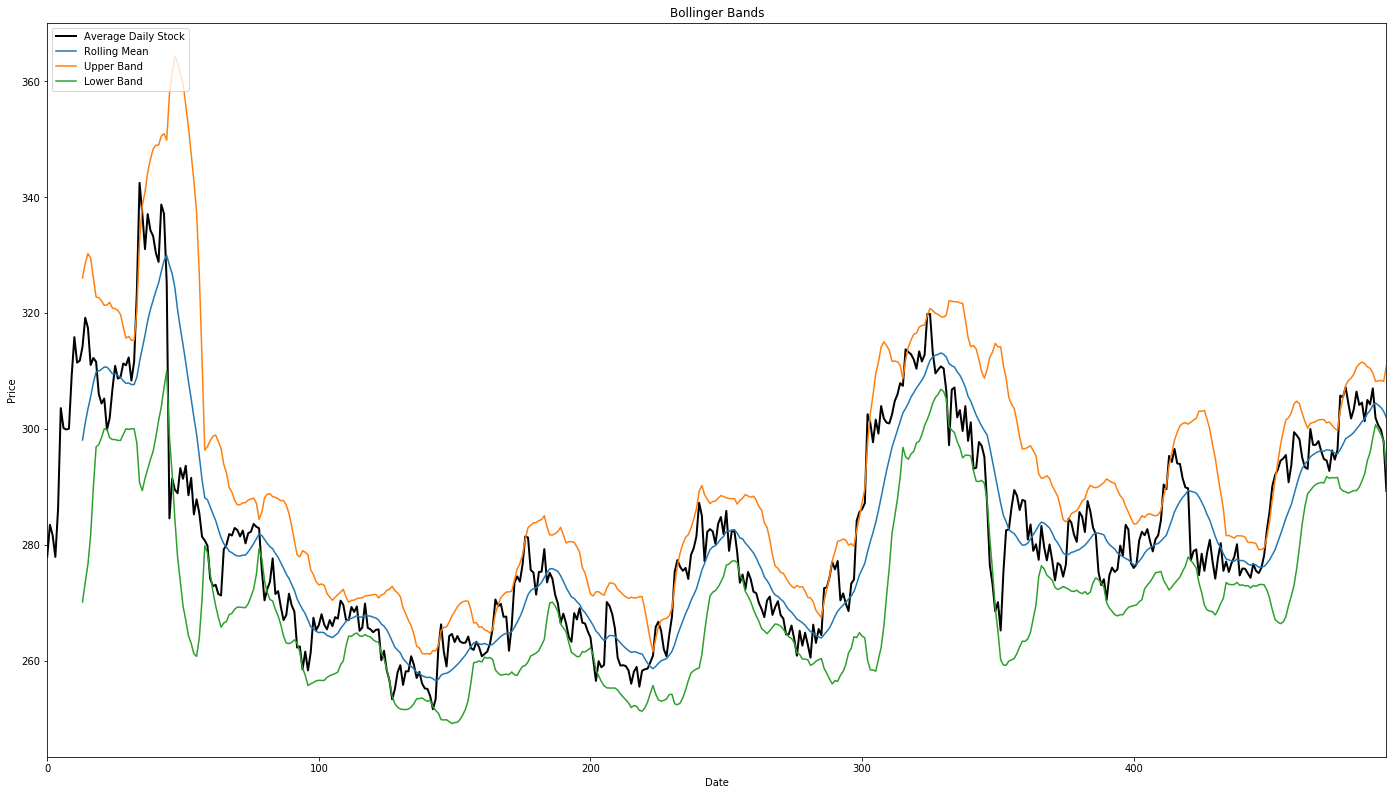

In [19]:
values = df_rmean
plotting_bollinger_bands(values, windows = 14)

In [20]:
# Adding Columns to itc dataframe

rm = get_rolling_mean(values, 14)
rstd = get_rolling_std(values, 14)
upper_band, lower_band = get_bollinger_bands(values, 14)


itc['upper_bollinger_band'] = upper_band
itc['lower_bollinger_band'] = lower_band
itc = itc.fillna(0)

In [21]:
itc

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,upper_bollinger_band,lower_bollinger_band
0,2017-05-15,ITC,EQ,274.95,275.90,278.90,275.50,278.50,277.95,277.78,5462855,1.517477e+09,52501,4128324,75.57,0.000000,0.000000
1,2017-05-16,ITC,EQ,277.95,278.50,284.30,278.00,283.00,283.45,280.93,11204308,3.147583e+09,98347,8307567,74.15,0.000000,0.000000
2,2017-05-17,ITC,EQ,283.45,284.10,284.40,279.25,281.50,281.65,281.56,8297700,2.336261e+09,99107,5924804,71.40,0.000000,0.000000
3,2017-05-18,ITC,EQ,281.65,278.00,281.05,277.05,277.65,277.90,278.49,7924261,2.206822e+09,47830,5434449,68.58,0.000000,0.000000
4,2017-05-19,ITC,EQ,277.90,282.25,295.65,281.95,286.40,286.20,290.08,35724128,1.036268e+10,248579,19137631,53.57,0.000000,0.000000
5,2017-05-22,ITC,EQ,286.20,292.45,304.80,291.30,303.00,303.60,299.75,35939315,1.077281e+10,250048,17079600,47.52,0.000000,0.000000
6,2017-05-23,ITC,EQ,303.60,301.90,303.90,298.25,300.00,300.15,300.39,19784738,5.943114e+09,127039,12142585,61.37,0.000000,0.000000
7,2017-05-24,ITC,EQ,300.15,300.00,301.95,297.90,300.10,299.90,299.95,9457848,2.836837e+09,87850,6078221,64.27,0.000000,0.000000
8,2017-05-25,ITC,EQ,299.90,300.00,304.70,295.35,301.00,300.05,300.00,22769975,6.830908e+09,110127,16464978,72.31,0.000000,0.000000
9,2017-05-26,ITC,EQ,300.05,302.00,313.80,299.55,306.10,309.10,305.48,21742467,6.641980e+09,155758,8123024,37.36,0.000000,0.000000


In [22]:
# Adding Call column in itc

df_itc = making_calls(itc)
df_itc

,Call,representer
0,Short,1
1,Short,1
2,Short,1
3,Short,1
4,Short,1
5,Short,1
6,Short,1
7,Short,1
8,Short,1
9,Short,1


In [23]:
frame = [itc, df_itc]
itc = pd.concat(frame, axis = 1)
itc = itc.set_index('Date')
itc = itc.fillna(0)
itc

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,upper_bollinger_band,lower_bollinger_band,Call,representer
Date,,,,,,,,,,,,,,,,,,
2017-05-15,ITC,EQ,274.95,275.90,278.90,275.50,278.50,277.95,277.78,5462855,1.517477e+09,52501,4128324,75.57,0.000000,0.000000,Short,1
2017-05-16,ITC,EQ,277.95,278.50,284.30,278.00,283.00,283.45,280.93,11204308,3.147583e+09,98347,8307567,74.15,0.000000,0.000000,Short,1
2017-05-17,ITC,EQ,283.45,284.10,284.40,279.25,281.50,281.65,281.56,8297700,2.336261e+09,99107,5924804,71.40,0.000000,0.000000,Short,1
2017-05-18,ITC,EQ,281.65,278.00,281.05,277.05,277.65,277.90,278.49,7924261,2.206822e+09,47830,5434449,68.58,0.000000,0.000000,Short,1
2017-05-19,ITC,EQ,277.90,282.25,295.65,281.95,286.40,286.20,290.08,35724128,1.036268e+10,248579,19137631,53.57,0.000000,0.000000,Short,1
2017-05-22,ITC,EQ,286.20,292.45,304.80,291.30,303.00,303.60,299.75,35939315,1.077281e+10,250048,17079600,47.52,0.000000,0.000000,Short,1
2017-05-23,ITC,EQ,303.60,301.90,303.90,298.25,300.00,300.15,300.39,19784738,5.943114e+09,127039,12142585,61.37,0.000000,0.000000,Short,1
2017-05-24,ITC,EQ,300.15,300.00,301.95,297.90,300.10,299.90,299.95,9457848,2.836837e+09,87850,6078221,64.27,0.000000,0.000000,Short,1
2017-05-25,ITC,EQ,299.90,300.00,304.70,295.35,301.00,300.05,300.00,22769975,6.830908e+09,110127,16464978,72.31,0.000000,0.000000,Short,1


### Checking the pre-trained model on new stock data 

In [24]:
x_data = [itc['Close Price'], itc['Average Price'], itc['upper_bollinger_band'], itc['lower_bollinger_band']]
x_tst = np.array(x_data)
x_tst = x_tst.T

y_tst = np.array(itc['representer'])

print(x_tst.shape)
print(y_tst.shape)

(494, 4)
(494,)


In [25]:
# use the model to make predictions with the test data
y_pred = model.predict(x_tst)
# how did our model perform?
count_misclassified = (y_tst != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_tst, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 78
Accuracy: 0.84


## The Accuracy of pre-trained model on new data of another stock is 84%

# --------------------------------------------------------------------------------------------------------

# Query 4.2

Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.  

* Import the stock data file of your choice


* Define 4 new columns , whose values are:   
    % change between Open and Close price for the day   
    % change between Low and High price for the day   
    5 day rolling mean of the day to day % change in Close Price   
    5 day rolling std of the day to day % change in Close Price    


* Create a new column 'Action' whose values are:     
    1 if next day's price(Close) is greater than present day's.   
    (-1) if next day's price(Close) is less than present day's.   
    i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ]   
    i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]    


* Construct a classification model with the 4 new inputs and 'Action' as target  

    
* Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

## 4.2.1 Import the stock data file of choice

The data file M&M_comp.csv was being computed in module 2. It is a sorted dataframe in which all Series column == EQ

In [26]:
# Importing the data for stocks

m_m = pd.read_csv('M&M_comp.csv')
mm = pd.DataFrame(m_m)
mm['Date'] = pd.to_datetime(mm['Date'])
mm = mm.fillna(0)
mm

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,year,month,day,Day_Perc_Change,Trend,upper_bollinger_band,lower_bollinger_band
0,2017-05-15,M&amp;M,EQ,1367.85,1373.00,1386.65,1370.00,1374.80,1375.65,1378.31,...,38442,386664,69.27,2017,5,15,0.000000,Slight or No change,0.000000,0.000000
1,2017-05-16,M&amp;M,EQ,1375.65,1377.00,1380.50,1363.10,1364.15,1366.35,1371.22,...,29075,334469,64.82,2017,5,16,-0.676044,Slight negative,0.000000,0.000000
2,2017-05-17,M&amp;M,EQ,1366.35,1363.00,1384.35,1360.40,1379.00,1378.80,1378.56,...,32299,689649,74.89,2017,5,17,0.911187,Slight positive,0.000000,0.000000
3,2017-05-18,M&amp;M,EQ,1378.80,1369.00,1372.00,1347.50,1347.50,1352.85,1361.70,...,20476,1043736,85.70,2017,5,18,-1.882071,Negative,0.000000,0.000000
4,2017-05-19,M&amp;M,EQ,1352.85,1350.00,1357.60,1328.50,1338.20,1333.40,1344.80,...,36297,773590,79.20,2017,5,19,-1.437706,Negative,0.000000,0.000000
5,2017-05-22,M&amp;M,EQ,1333.40,1340.15,1341.95,1301.10,1307.00,1306.25,1313.89,...,26521,261661,59.90,2017,5,22,-2.036148,Negative,0.000000,0.000000
6,2017-05-23,M&amp;M,EQ,1306.25,1315.00,1338.35,1300.00,1328.35,1331.75,1324.90,...,40561,445992,57.17,2017,5,23,1.952153,Positive,0.000000,0.000000
7,2017-05-24,M&amp;M,EQ,1331.75,1331.50,1338.80,1301.45,1308.00,1308.65,1314.05,...,29997,382266,61.10,2017,5,24,-1.734560,Negative,0.000000,0.000000
8,2017-05-25,M&amp;M,EQ,1308.65,1311.00,1335.90,1304.00,1335.90,1327.50,1321.97,...,60911,1095811,75.23,2017,5,25,1.440416,Positive,0.000000,0.000000
9,2017-05-26,M&amp;M,EQ,1327.50,1334.00,1348.90,1327.50,1341.00,1340.85,1339.17,...,16125,156414,46.66,2017,5,26,1.005650,Positive,0.000000,0.000000


## 4.2.2 Define 4 new columns , whose values are:

% change between Open and Close price for the day  
% change between Low and High price for the day  
5 day rolling mean of the day to day % change in Close Price  
5 day rolling std of the day to day % change in Close Price  

In [27]:
# adding % change between Open and Close price for the day
abc = np.subtract( mm['Close Price'], mm['Open Price'])
adc = np.divide(abc, mm['Open Price'])
ab = np.multiply(adc, 100)

In [28]:
mm['open_close_change'] = ab

In [29]:
mm

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Deliverable Qty,% Dly Qt to Traded Qty,year,month,day,Day_Perc_Change,Trend,upper_bollinger_band,lower_bollinger_band,open_close_change
0,2017-05-15,M&amp;M,EQ,1367.85,1373.00,1386.65,1370.00,1374.80,1375.65,1378.31,...,386664,69.27,2017,5,15,0.000000,Slight or No change,0.000000,0.000000,0.193008
1,2017-05-16,M&amp;M,EQ,1375.65,1377.00,1380.50,1363.10,1364.15,1366.35,1371.22,...,334469,64.82,2017,5,16,-0.676044,Slight negative,0.000000,0.000000,-0.773420
2,2017-05-17,M&amp;M,EQ,1366.35,1363.00,1384.35,1360.40,1379.00,1378.80,1378.56,...,689649,74.89,2017,5,17,0.911187,Slight positive,0.000000,0.000000,1.159208
3,2017-05-18,M&amp;M,EQ,1378.80,1369.00,1372.00,1347.50,1347.50,1352.85,1361.70,...,1043736,85.70,2017,5,18,-1.882071,Negative,0.000000,0.000000,-1.179693
4,2017-05-19,M&amp;M,EQ,1352.85,1350.00,1357.60,1328.50,1338.20,1333.40,1344.80,...,773590,79.20,2017,5,19,-1.437706,Negative,0.000000,0.000000,-1.229630
5,2017-05-22,M&amp;M,EQ,1333.40,1340.15,1341.95,1301.10,1307.00,1306.25,1313.89,...,261661,59.90,2017,5,22,-2.036148,Negative,0.000000,0.000000,-2.529568
6,2017-05-23,M&amp;M,EQ,1306.25,1315.00,1338.35,1300.00,1328.35,1331.75,1324.90,...,445992,57.17,2017,5,23,1.952153,Positive,0.000000,0.000000,1.273764
7,2017-05-24,M&amp;M,EQ,1331.75,1331.50,1338.80,1301.45,1308.00,1308.65,1314.05,...,382266,61.10,2017,5,24,-1.734560,Negative,0.000000,0.000000,-1.716110
8,2017-05-25,M&amp;M,EQ,1308.65,1311.00,1335.90,1304.00,1335.90,1327.50,1321.97,...,1095811,75.23,2017,5,25,1.440416,Positive,0.000000,0.000000,1.258581
9,2017-05-26,M&amp;M,EQ,1327.50,1334.00,1348.90,1327.50,1341.00,1340.85,1339.17,...,156414,46.66,2017,5,26,1.005650,Positive,0.000000,0.000000,0.513493


In [30]:
## adding % change between Low and High price for the day

abc1 = np.subtract( mm['High Price'], mm['Low Price'])
adc1 = np.divide(abc1, mm['Low Price'])
ab1 = np.multiply(adc1, 100)       

In [31]:
mm['high_low_change'] = ab1
mm

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,% Dly Qt to Traded Qty,year,month,day,Day_Perc_Change,Trend,upper_bollinger_band,lower_bollinger_band,open_close_change,high_low_change
0,2017-05-15,M&amp;M,EQ,1367.85,1373.00,1386.65,1370.00,1374.80,1375.65,1378.31,...,69.27,2017,5,15,0.000000,Slight or No change,0.000000,0.000000,0.193008,1.215328
1,2017-05-16,M&amp;M,EQ,1375.65,1377.00,1380.50,1363.10,1364.15,1366.35,1371.22,...,64.82,2017,5,16,-0.676044,Slight negative,0.000000,0.000000,-0.773420,1.276502
2,2017-05-17,M&amp;M,EQ,1366.35,1363.00,1384.35,1360.40,1379.00,1378.80,1378.56,...,74.89,2017,5,17,0.911187,Slight positive,0.000000,0.000000,1.159208,1.760512
3,2017-05-18,M&amp;M,EQ,1378.80,1369.00,1372.00,1347.50,1347.50,1352.85,1361.70,...,85.70,2017,5,18,-1.882071,Negative,0.000000,0.000000,-1.179693,1.818182
4,2017-05-19,M&amp;M,EQ,1352.85,1350.00,1357.60,1328.50,1338.20,1333.40,1344.80,...,79.20,2017,5,19,-1.437706,Negative,0.000000,0.000000,-1.229630,2.190440
5,2017-05-22,M&amp;M,EQ,1333.40,1340.15,1341.95,1301.10,1307.00,1306.25,1313.89,...,59.90,2017,5,22,-2.036148,Negative,0.000000,0.000000,-2.529568,3.139651
6,2017-05-23,M&amp;M,EQ,1306.25,1315.00,1338.35,1300.00,1328.35,1331.75,1324.90,...,57.17,2017,5,23,1.952153,Positive,0.000000,0.000000,1.273764,2.950000
7,2017-05-24,M&amp;M,EQ,1331.75,1331.50,1338.80,1301.45,1308.00,1308.65,1314.05,...,61.10,2017,5,24,-1.734560,Negative,0.000000,0.000000,-1.716110,2.869876
8,2017-05-25,M&amp;M,EQ,1308.65,1311.00,1335.90,1304.00,1335.90,1327.50,1321.97,...,75.23,2017,5,25,1.440416,Positive,0.000000,0.000000,1.258581,2.446319
9,2017-05-26,M&amp;M,EQ,1327.50,1334.00,1348.90,1327.50,1341.00,1340.85,1339.17,...,46.66,2017,5,26,1.005650,Positive,0.000000,0.000000,0.513493,1.612053


In [32]:
## adding 5 day rolling mean of the day to day % change in Close Price

mm_rm = get_rolling_mean(mm['open_close_change'], 5)
mm['close_change_rm'] = mm_rm
mm = mm.fillna(0)
mm

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,year,month,day,Day_Perc_Change,Trend,upper_bollinger_band,lower_bollinger_band,open_close_change,high_low_change,close_change_rm
0,2017-05-15,M&amp;M,EQ,1367.85,1373.00,1386.65,1370.00,1374.80,1375.65,1378.31,...,2017,5,15,0.000000,Slight or No change,0.000000,0.000000,0.193008,1.215328,0.000000
1,2017-05-16,M&amp;M,EQ,1375.65,1377.00,1380.50,1363.10,1364.15,1366.35,1371.22,...,2017,5,16,-0.676044,Slight negative,0.000000,0.000000,-0.773420,1.276502,0.000000
2,2017-05-17,M&amp;M,EQ,1366.35,1363.00,1384.35,1360.40,1379.00,1378.80,1378.56,...,2017,5,17,0.911187,Slight positive,0.000000,0.000000,1.159208,1.760512,0.000000
3,2017-05-18,M&amp;M,EQ,1378.80,1369.00,1372.00,1347.50,1347.50,1352.85,1361.70,...,2017,5,18,-1.882071,Negative,0.000000,0.000000,-1.179693,1.818182,0.000000
4,2017-05-19,M&amp;M,EQ,1352.85,1350.00,1357.60,1328.50,1338.20,1333.40,1344.80,...,2017,5,19,-1.437706,Negative,0.000000,0.000000,-1.229630,2.190440,-0.366106
5,2017-05-22,M&amp;M,EQ,1333.40,1340.15,1341.95,1301.10,1307.00,1306.25,1313.89,...,2017,5,22,-2.036148,Negative,0.000000,0.000000,-2.529568,3.139651,-0.910621
6,2017-05-23,M&amp;M,EQ,1306.25,1315.00,1338.35,1300.00,1328.35,1331.75,1324.90,...,2017,5,23,1.952153,Positive,0.000000,0.000000,1.273764,2.950000,-0.501184
7,2017-05-24,M&amp;M,EQ,1331.75,1331.50,1338.80,1301.45,1308.00,1308.65,1314.05,...,2017,5,24,-1.734560,Negative,0.000000,0.000000,-1.716110,2.869876,-1.076247
8,2017-05-25,M&amp;M,EQ,1308.65,1311.00,1335.90,1304.00,1335.90,1327.50,1321.97,...,2017,5,25,1.440416,Positive,0.000000,0.000000,1.258581,2.446319,-0.588592
9,2017-05-26,M&amp;M,EQ,1327.50,1334.00,1348.90,1327.50,1341.00,1340.85,1339.17,...,2017,5,26,1.005650,Positive,0.000000,0.000000,0.513493,1.612053,-0.239968


In [33]:
## adding 5 day rolling std of the day to day % change in Close Price

mm_std = get_rolling_std(mm['open_close_change'], 5)
mm['close_change_std'] = mm_std
mm = mm.fillna(0)
mm

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,month,day,Day_Perc_Change,Trend,upper_bollinger_band,lower_bollinger_band,open_close_change,high_low_change,close_change_rm,close_change_std
0,2017-05-15,M&amp;M,EQ,1367.85,1373.00,1386.65,1370.00,1374.80,1375.65,1378.31,...,5,15,0.000000,Slight or No change,0.000000,0.000000,0.193008,1.215328,0.000000,0.000000
1,2017-05-16,M&amp;M,EQ,1375.65,1377.00,1380.50,1363.10,1364.15,1366.35,1371.22,...,5,16,-0.676044,Slight negative,0.000000,0.000000,-0.773420,1.276502,0.000000,0.000000
2,2017-05-17,M&amp;M,EQ,1366.35,1363.00,1384.35,1360.40,1379.00,1378.80,1378.56,...,5,17,0.911187,Slight positive,0.000000,0.000000,1.159208,1.760512,0.000000,0.000000
3,2017-05-18,M&amp;M,EQ,1378.80,1369.00,1372.00,1347.50,1347.50,1352.85,1361.70,...,5,18,-1.882071,Negative,0.000000,0.000000,-1.179693,1.818182,0.000000,0.000000
4,2017-05-19,M&amp;M,EQ,1352.85,1350.00,1357.60,1328.50,1338.20,1333.40,1344.80,...,5,19,-1.437706,Negative,0.000000,0.000000,-1.229630,2.190440,-0.366106,1.026242
5,2017-05-22,M&amp;M,EQ,1333.40,1340.15,1341.95,1301.10,1307.00,1306.25,1313.89,...,5,22,-2.036148,Negative,0.000000,0.000000,-2.529568,3.139651,-0.910621,1.332119
6,2017-05-23,M&amp;M,EQ,1306.25,1315.00,1338.35,1300.00,1328.35,1331.75,1324.90,...,5,23,1.952153,Positive,0.000000,0.000000,1.273764,2.950000,-0.501184,1.659269
7,2017-05-24,M&amp;M,EQ,1331.75,1331.50,1338.80,1301.45,1308.00,1308.65,1314.05,...,5,24,-1.734560,Negative,0.000000,0.000000,-1.716110,2.869876,-1.076247,1.421121
8,2017-05-25,M&amp;M,EQ,1308.65,1311.00,1335.90,1304.00,1335.90,1327.50,1321.97,...,5,25,1.440416,Positive,0.000000,0.000000,1.258581,2.446319,-0.588592,1.755707
9,2017-05-26,M&amp;M,EQ,1327.50,1334.00,1348.90,1327.50,1341.00,1340.85,1339.17,...,5,26,1.005650,Positive,0.000000,0.000000,0.513493,1.612053,-0.239968,1.769604


## 4.2.3 Create a new column 'Action' whose values are: 

1 if next day's price(Close) is greater than present day's.   
(-1) if next day's price(Close) is less than present day's.   
i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ]   
i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]  

In [34]:
## adding action column

def add_action(df):
    
    act = pd.DataFrame(columns = ['Action', 'act'])
    
    for i in range(0, len(df['Close Price'])-1):
        
        chk = df['Close Price'][i]
        chk1 = df['Close Price'][i + 1]
        
        if chk1 >= chk:
            act = act.append({'Action': 1, 'act':1}, ignore_index = True)
            
        elif chk1 < chk:
            act = act.append({'Action': -1, 'act': 0}, ignore_index = True)
            
    act = act.append({'Action': 1, 'act':1}, ignore_index = True)
    return act

In [35]:
action = add_action(mm)
action

,Action,act
0,-1,0
1,1,1
2,-1,0
3,-1,0
4,-1,0
5,1,1
6,-1,0
7,1,1
8,1,1
9,1,1


In [36]:
# adding action column to dataframe

frm = [mm, action]
mm = pd.concat(frm, axis = 1)
mm

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Day_Perc_Change,Trend,upper_bollinger_band,lower_bollinger_band,open_close_change,high_low_change,close_change_rm,close_change_std,Action,act
0,2017-05-15,M&amp;M,EQ,1367.85,1373.00,1386.65,1370.00,1374.80,1375.65,1378.31,...,0.000000,Slight or No change,0.000000,0.000000,0.193008,1.215328,0.000000,0.000000,-1,0
1,2017-05-16,M&amp;M,EQ,1375.65,1377.00,1380.50,1363.10,1364.15,1366.35,1371.22,...,-0.676044,Slight negative,0.000000,0.000000,-0.773420,1.276502,0.000000,0.000000,1,1
2,2017-05-17,M&amp;M,EQ,1366.35,1363.00,1384.35,1360.40,1379.00,1378.80,1378.56,...,0.911187,Slight positive,0.000000,0.000000,1.159208,1.760512,0.000000,0.000000,-1,0
3,2017-05-18,M&amp;M,EQ,1378.80,1369.00,1372.00,1347.50,1347.50,1352.85,1361.70,...,-1.882071,Negative,0.000000,0.000000,-1.179693,1.818182,0.000000,0.000000,-1,0
4,2017-05-19,M&amp;M,EQ,1352.85,1350.00,1357.60,1328.50,1338.20,1333.40,1344.80,...,-1.437706,Negative,0.000000,0.000000,-1.229630,2.190440,-0.366106,1.026242,-1,0
5,2017-05-22,M&amp;M,EQ,1333.40,1340.15,1341.95,1301.10,1307.00,1306.25,1313.89,...,-2.036148,Negative,0.000000,0.000000,-2.529568,3.139651,-0.910621,1.332119,1,1
6,2017-05-23,M&amp;M,EQ,1306.25,1315.00,1338.35,1300.00,1328.35,1331.75,1324.90,...,1.952153,Positive,0.000000,0.000000,1.273764,2.950000,-0.501184,1.659269,-1,0
7,2017-05-24,M&amp;M,EQ,1331.75,1331.50,1338.80,1301.45,1308.00,1308.65,1314.05,...,-1.734560,Negative,0.000000,0.000000,-1.716110,2.869876,-1.076247,1.421121,1,1
8,2017-05-25,M&amp;M,EQ,1308.65,1311.00,1335.90,1304.00,1335.90,1327.50,1321.97,...,1.440416,Positive,0.000000,0.000000,1.258581,2.446319,-0.588592,1.755707,1,1
9,2017-05-26,M&amp;M,EQ,1327.50,1334.00,1348.90,1327.50,1341.00,1340.85,1339.17,...,1.005650,Positive,0.000000,0.000000,0.513493,1.612053,-0.239968,1.769604,1,1


## 4.2.4 Construct a classification model with the 4 new inputs and 'Action' as target

In [37]:
dataset = mm[['open_close_change', 'high_low_change', 'close_change_rm', 'close_change_std', 'Action']]
dataset


,open_close_change,high_low_change,close_change_rm,close_change_std,Action
0,0.193008,1.215328,0.000000,0.000000,-1
1,-0.773420,1.276502,0.000000,0.000000,1
2,1.159208,1.760512,0.000000,0.000000,-1
3,-1.179693,1.818182,0.000000,0.000000,-1
4,-1.229630,2.190440,-0.366106,1.026242,-1
5,-2.529568,3.139651,-0.910621,1.332119,1
6,1.273764,2.950000,-0.501184,1.659269,-1
7,-1.716110,2.869876,-1.076247,1.421121,1
8,1.258581,2.446319,-0.588592,1.755707,1
9,0.513493,1.612053,-0.239968,1.769604,1


In [58]:
X = dataset[['open_close_change', 'high_low_change', 'close_change_rm', 'close_change_std']].values
y = dataset['Action'].values
y=y.astype('int')

In [59]:
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)
y_train=y_train.astype('int')


In [68]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

# random forest model creation
rfc = RandomForestClassifier(n_estimators=70)
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [76]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [77]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[23 29]
 [23 24]]


=== Classification Report ===
              precision    recall  f1-score   support

          -1       0.50      0.44      0.47        52
           1       0.45      0.51      0.48        47

    accuracy                           0.47        99
   macro avg       0.48      0.48      0.47        99
weighted avg       0.48      0.47      0.47        99



=== All AUC Scores ===
[0.54967949 0.50240385 0.48878205 0.50480769 0.55183946 0.54598662
 0.56187291 0.50585284 0.57441472 0.52759197]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.5313231605351172


## The Accuracy of Random Forest Algorithm is --> 53.40788740245263% on test set

In [78]:
predict_call = rfc.predict(X)

In [82]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y, predict_call))
print('\n')
print("=== Classification Report ===")
print(classification_report(y, predict_call))
print('\n')
print(accuracy_score(y, predict_call))


=== Confusion Matrix ===
[[205  29]
 [ 23 237]]


=== Classification Report ===
              precision    recall  f1-score   support

          -1       0.90      0.88      0.89       234
           1       0.89      0.91      0.90       260

    accuracy                           0.89       494
   macro avg       0.90      0.89      0.89       494
weighted avg       0.89      0.89      0.89       494



0.8947368421052632


## The accuracy of random forest on entire dataset is --> 89.47368421052632%

## 4.2.5 Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

In [81]:
mm

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Day_Perc_Change,Trend,upper_bollinger_band,lower_bollinger_band,open_close_change,high_low_change,close_change_rm,close_change_std,Action,act
0,2017-05-15,M&amp;M,EQ,1367.85,1373.00,1386.65,1370.00,1374.80,1375.65,1378.31,...,0.000000,Slight or No change,0.000000,0.000000,0.193008,1.215328,0.000000,0.000000,-1,0
1,2017-05-16,M&amp;M,EQ,1375.65,1377.00,1380.50,1363.10,1364.15,1366.35,1371.22,...,-0.676044,Slight negative,0.000000,0.000000,-0.773420,1.276502,0.000000,0.000000,1,1
2,2017-05-17,M&amp;M,EQ,1366.35,1363.00,1384.35,1360.40,1379.00,1378.80,1378.56,...,0.911187,Slight positive,0.000000,0.000000,1.159208,1.760512,0.000000,0.000000,-1,0
3,2017-05-18,M&amp;M,EQ,1378.80,1369.00,1372.00,1347.50,1347.50,1352.85,1361.70,...,-1.882071,Negative,0.000000,0.000000,-1.179693,1.818182,0.000000,0.000000,-1,0
4,2017-05-19,M&amp;M,EQ,1352.85,1350.00,1357.60,1328.50,1338.20,1333.40,1344.80,...,-1.437706,Negative,0.000000,0.000000,-1.229630,2.190440,-0.366106,1.026242,-1,0
5,2017-05-22,M&amp;M,EQ,1333.40,1340.15,1341.95,1301.10,1307.00,1306.25,1313.89,...,-2.036148,Negative,0.000000,0.000000,-2.529568,3.139651,-0.910621,1.332119,1,1
6,2017-05-23,M&amp;M,EQ,1306.25,1315.00,1338.35,1300.00,1328.35,1331.75,1324.90,...,1.952153,Positive,0.000000,0.000000,1.273764,2.950000,-0.501184,1.659269,-1,0
7,2017-05-24,M&amp;M,EQ,1331.75,1331.50,1338.80,1301.45,1308.00,1308.65,1314.05,...,-1.734560,Negative,0.000000,0.000000,-1.716110,2.869876,-1.076247,1.421121,1,1
8,2017-05-25,M&amp;M,EQ,1308.65,1311.00,1335.90,1304.00,1335.90,1327.50,1321.97,...,1.440416,Positive,0.000000,0.000000,1.258581,2.446319,-0.588592,1.755707,1,1
9,2017-05-26,M&amp;M,EQ,1327.50,1334.00,1348.90,1327.50,1341.00,1340.85,1339.17,...,1.005650,Positive,0.000000,0.000000,0.513493,1.612053,-0.239968,1.769604,1,1


In [129]:
def compute_cumulative_returns(df, predict_call, n):
    
    daily_returns = np.array([])
    
    for j in range(0, n):
        daily_returns = np.append(daily_returns, 0)
    
    for i in range(n, len(df)):
        
        if predict_call[i] == 1:
            daily_returns = np.append(daily_returns, ((df[i]/df[i-n]) - 1)*100)
            
            
            
        elif predict_call[i] == -1:
            daily_returns = np.append(daily_returns, 0)
            
            
            
    return daily_returns

In [130]:
axas = compute_cumulative_returns(mm['Close Price'], predict_call, 1 )

In [131]:
axas.shape

(494,)

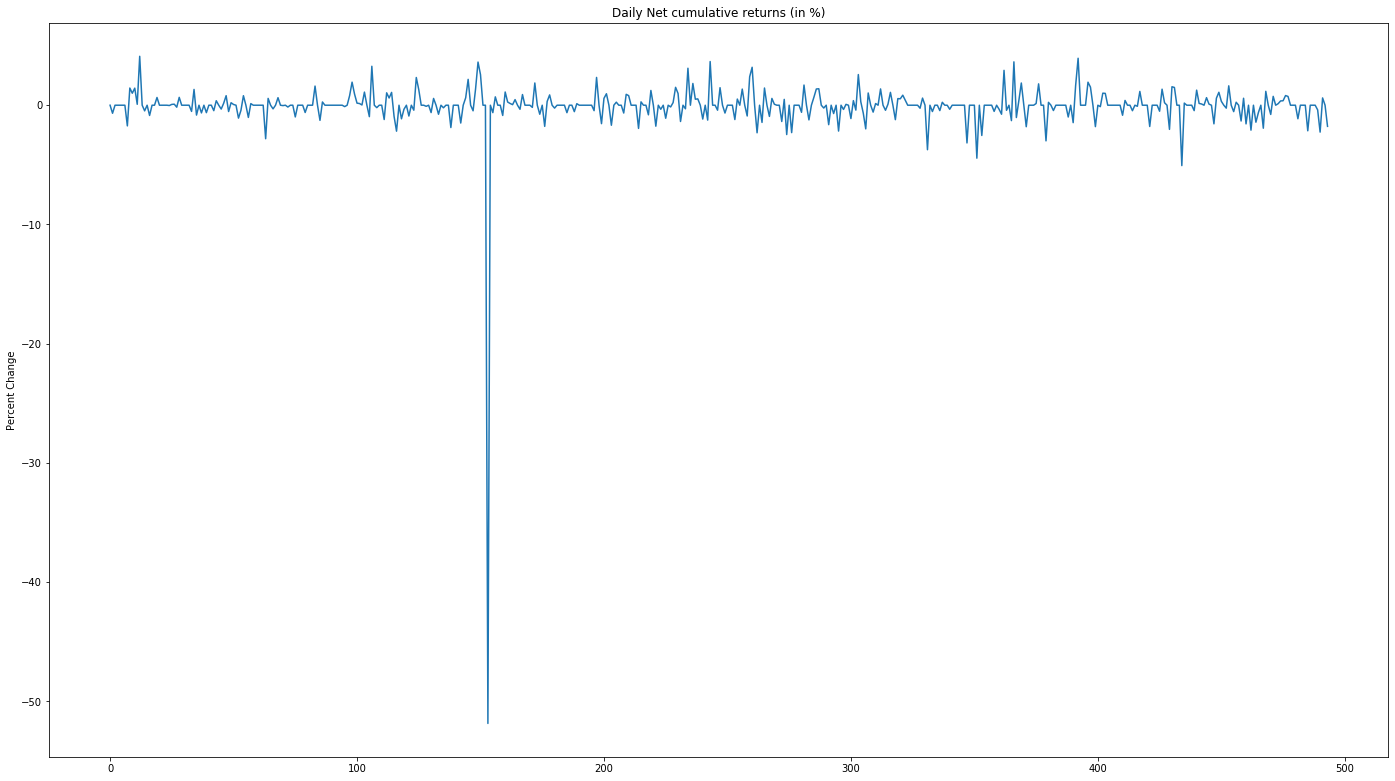

In [132]:
plt.plot(axas)
plt.title('Daily Net cumulative returns (in %)')
plt.ylabel('Percent Change')
plt.show()

In [136]:
mn_c_ret = compute_cumulative_returns(mm['Close Price'], predict_call, 25 )

In [137]:
mn_c_ret

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  9.15930651e-01,  1.69063564e+00,  6.05599072e-01,
        3.21173818e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.58945386e+00,  1.90923668e+00, -3.60280872e-01,
        0.00000000e+00, -2.88648153e+00,  0.00000000e+00, -3.60239690e+00,
        0.00000000e+00,  0.00000000e+00, -4.29499267e+00, -2.95943563e+00,
        0.00000000e+00, -3.04871624e+00, -2.48650936e+00, -8.36179903e-01,
       -1.15302850e-01,  1.18936063e-01,  1.11651360e-01,  0.00000000e+00,
        7.96597340e-01, -

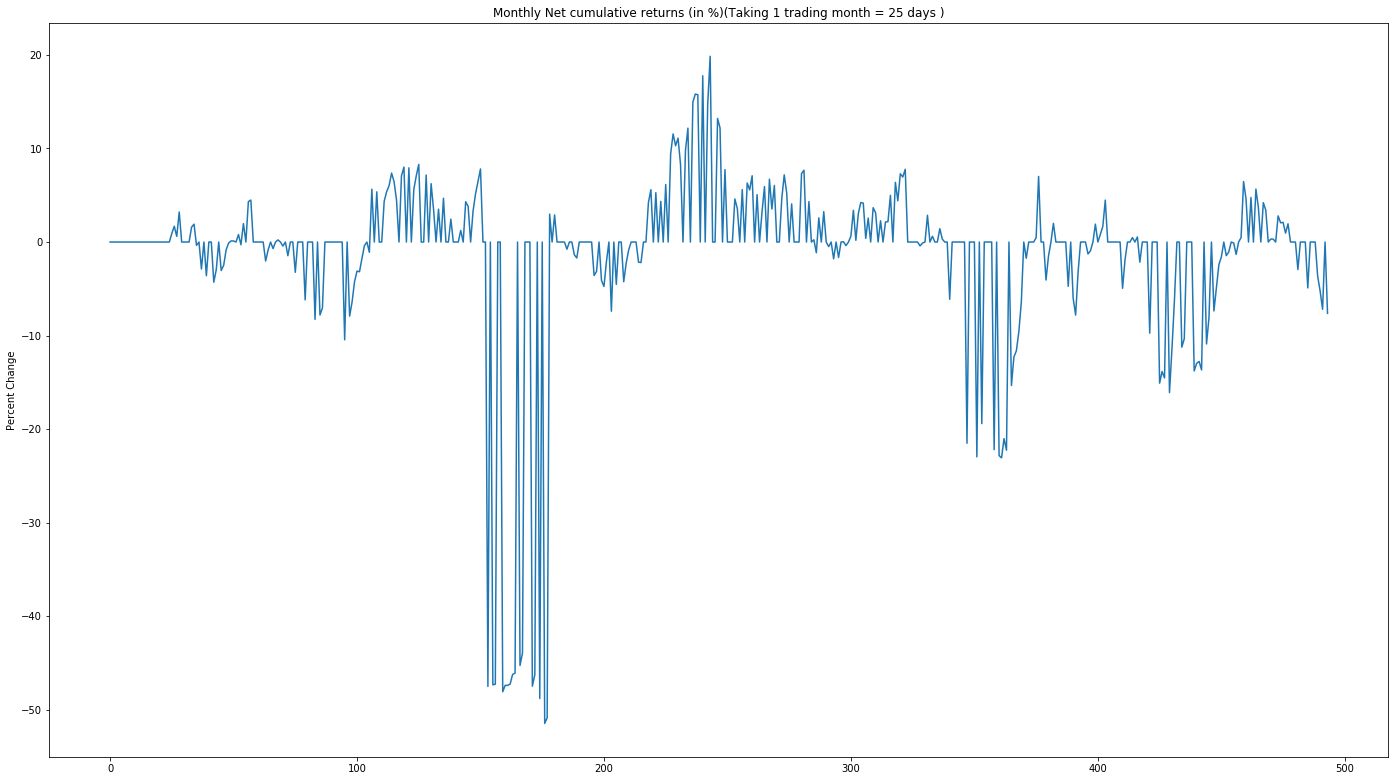

In [138]:
plt.plot(mn_c_ret)
plt.title('Monthly Net cumulative returns (in %)(Taking 1 trading month = 25 days )')
plt.ylabel('Percent Change')
plt.show()

# --------------------------------The End--------------------------------